# 1. Numpy Intro
For built in matrices.

In [1]:
!pip install matplotlib
%matplotlib inline 
%run mplimp.py


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Exception: File `'mplimp.py'` not found.

In [3]:
import numpy as np

In [ ]:
np.random.seed(1337)            # allow result reproducibility

### 1.1. Basics of Matrices

In [ ]:
x = np.array(  [1, 4, 3]  )     # fixed size + homogeneous data type
x

array([1, 4, 3])

In [6]:
y = np.array([ [1, 4, 3], 
               [9, 2, 7] ] )
y

array([[1, 4, 3],
       [9, 2, 7]])

In [ ]:
x.shape  # rank 1 tensor

(3,)

In [8]:
y.shape

(2, 3)

In [9]:
z = np.array(  [ [1, 4, 3] ]  )   # What's the difference?

In [10]:
z.shape

(1, 3)

In [22]:
z = np.arange(1, 2000, 1)  # start, end(exclusive), step
z[:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
z.shape

(1999,)

In [13]:
np.arange(0.5, 3, 0.5)

array([0.5, 1. , 1.5, 2. , 2.5])

In [14]:
np.arange(0.5, 10, 1).shape

(10,)

In [24]:
np.arange(0.5, 10, 1).reshape(5, 2).shape

(5, 2)

In [16]:
np.arange(0.5, 10, 1).reshape(5, 3).shape  # !!

ValueError: cannot reshape array of size 10 into shape (5,3)

In [25]:
# Evenly spaced but we don't know the step 
np.linspace(3, 9, 10)

array([3.        , 3.66666667, 4.33333333, 5.        , 5.66666667,
       6.33333333, 7.        , 7.66666667, 8.33333333, 9.        ])

In [26]:
print(x)
print(x[1]) 
print(x[1:])

[1 4 3]
4
[4 3]


In [ ]:
print(y)
y[0, 1]   # this is extra in numpy (row 0, col 1)

[[1 4 3]
 [9 2 7]]


np.int64(4)

In [ ]:
y[:, 1] # all rows, 1st col

array([4, 2])

In [ ]:
y[:, [1, 2]] # all rows, col 1 and 2

array([[4, 3],
       [2, 7]])

### 1.2. Matrix Operations

In [30]:
np.zeros((3, 5))

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [31]:
np.ones((5, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [32]:
a = np.arange(1, 7)
a

array([1, 2, 3, 4, 5, 6])

In [33]:
a.shape

(6,)

In [34]:
a[3] = 7
a

array([1, 2, 3, 7, 5, 6])

In [35]:
a[:3] = 1   # Assign to multiple locations 
a

array([1, 1, 1, 7, 5, 6])

In [36]:
a[1:4] = [9, 8, 7]
a

array([1, 9, 8, 7, 5, 6])

In [37]:
# This is most useful 
b = np.zeros((2, 2))
b[0, 0] = 1
b[0, 1] = 2
b[1, 1] = 4
b

array([[1., 2.],
       [0., 4.]])

In [38]:
b.shape

(2, 2)

### 1.3. Array Operations

In [39]:
print(b)

[[1. 2.]
 [0. 4.]]


In [40]:
b + 2

array([[3., 4.],
       [2., 6.]])

In [41]:
2 * b

array([[2., 4.],
       [0., 8.]])

In [42]:
b ** 2

array([[ 1.,  4.],
       [ 0., 16.]])

In [ ]:
sum(b) # col wise sum

array([1., 6.])

In [ ]:
b.sum() # row wise sum

np.int64(10)

In [45]:
b.sum(axis=0).shape

(2,)

In [46]:
b.sum(axis=1).shape

(2,)

In [47]:
b = np.array([[1, 2], [3, 4]])
d = np.array([[3, 4], [5, 6]])

In [48]:
print(b) 
print(d)

[[1 2]
 [3 4]]
[[3 4]
 [5 6]]


In [49]:
b + d

array([[ 4,  6],
       [ 8, 10]])

In [50]:
b * d     # what operation is this?

array([[ 3,  8],
       [15, 24]])

In [51]:
b.dot(d)  # and this?

array([[13, 16],
       [29, 36]])

In [52]:
b ** d

array([[   1,   16],
       [ 243, 4096]])

In [ ]:
b.T  # transpose

array([[1, 3],
       [2, 4]])

In [54]:
a

array([1, 9, 8, 7, 5, 6])

In [55]:
a.shape

(6,)

In [56]:
a.T

array([1, 9, 8, 7, 5, 6])

In [57]:
a.T.shape

(6,)

In [58]:
a.reshape(6,1).T.shape

(1, 6)

In [59]:
# Numpy has "broadcasting" or "mapping" functions 
print(np.sqrt(36))

# works on both scalars and arrays 
x = [1, 4, 9, 16]
np.sqrt(x)

6.0


array([1., 2., 3., 4.])

In [60]:
# Checking conditions 
x = np.array([1, 2, 4, 5, 9, 3])
y = np.array([0, 2, 3, 1, 2, 3])

In [61]:
x > 3

array([False, False,  True,  True,  True, False])

In [62]:
x > y

array([ True, False,  True,  True,  True, False])

## 2. Misc Operations with Numpy

In [63]:
import math
def basic_sigmoid(x):
    """
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)
    """
    
    s = 1./(1. + math.e ** (-x))
    
    return s

In [69]:
help(basic_sigmoid)

Help on function basic_sigmoid in module __main__:

basic_sigmoid(x)
    Compute sigmoid of x.

    Arguments:
    x -- A scalar

    Return:
    s -- sigmoid(x)



In [64]:
basic_sigmoid(-1)

0.2689414213699951

In [65]:
basic_sigmoid(0)

0.5

In [66]:
x = [-1, 0, 3]
basic_sigmoid(x)   # Why

TypeError: bad operand type for unary -: 'list'

In [70]:
import numpy as np

x = [-1, 0, 3]
x = np.array(x)
basic_sigmoid(x)

array([0.26894142, 0.5       , 0.95257413])

### 2.1. Broadcasting

In [1]:
import numpy as np

In [2]:
# What is broadcasting? 
x = np.array([1, 2, 3])
x * 3  # This makes sense

array([3, 6, 9])

In [3]:
x + 3   # Does this?

array([4, 5, 6])

General rule: Two dimensions are compatible when
- they are equal, or
- one of them is 1

In [4]:
x = np.arange(4)
xx = x.reshape(4, 1)
y = np.ones(5)
z = np.ones((3,4))

print("x =  ", x)
print("xx = ", xx) 
print("y =  ", y)

print("Shapes: ") 
print(x.shape)
print(xx.shape)
print(y.shape)

x =   [0 1 2 3]
xx =  [[0]
 [1]
 [2]
 [3]]
y =   [1. 1. 1. 1. 1.]
Shapes: 
(4,)
(4, 1)
(5,)


In [5]:
x + y    # does not work

ValueError: operands could not be broadcast together with shapes (4,) (5,) 

In [6]:
xx.shape, x.shape

((4, 1), (4,))

In [7]:
print(y)
print(xx)

[1. 1. 1. 1. 1.]
[[0]
 [1]
 [2]
 [3]]


In [8]:
out = xx + y       # xx is broadcast over the columns of y

In [9]:
out

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4.]])

In [10]:
out.shape

(4, 5)

In [11]:
np.array([1]) + y      # element is broadcast over y

array([2., 2., 2., 2., 2.])

In [12]:
print(z)
z.shape

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


(3, 4)

In [13]:
x.shape

(4,)

In [14]:
x

array([0, 1, 2, 3])

In [15]:
z + x

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [16]:
a = np.array([[ 0.0 , 0.0,  0.0  ],
              [ 10.0, 10.0, 10.0 ],
              [ 20.0, 20.0, 20.0 ],
              [ 30.0, 30.0, 30.0 ]])

b = np.array( [ 1.0,  2.0,  3.0  ] )

In [17]:
a + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [18]:
a = np.array([[ 0.0 , 0.0,  0.0  , 0.0  ],
              [ 10.0, 10.0, 10.0 , 10.0 ],
              [ 20.0, 20.0, 20.0 , 20.0 ],
              [ 30.0, 30.0, 30.0 , 30.0 ]])

b = np.array( [ 1.0,  2.0] )

In [19]:
a + b

ValueError: operands could not be broadcast together with shapes (4,4) (2,) 

In [21]:
a = np.array( [ 0.0, 10.0, 20.0, 30.0 ] )
b = np.array( [ 1.0, 2.0,  3.0 ]        )

In [22]:
a + b    # can't broadcast

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [23]:
print(a.shape, b.shape)

(4,) (3,)


In [24]:
a1 = a.reshape(4, 1)

In [25]:
a1 + b

array([[ 1.,  2.,  3.],
       [11., 12., 13.],
       [21., 22., 23.],
       [31., 32., 33.]])

In [26]:
print(a1.shape, b.shape)

(4, 1) (3,)


In [27]:
print(a1)

[[ 0.]
 [10.]
 [20.]
 [30.]]


### 2.2. Normalizing Rows and Columns

Often, we wish to normalize value of a row to fall within a specific range.

In [28]:
x = np.array([ [ 0, 3, 4 ],
               [ 1, 6, 4 ] ])

In [29]:
x_norm = np.amax(x, axis=1)   # get row-wise max 
print(x_norm)

[4 6]


In [30]:
x / x_norm     # this does not work. Why?

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [31]:
print(x.shape)
print(x_norm.shape)

(2, 3)
(2,)


In [32]:
x_norm = x_norm.reshape(2, 1)

In [33]:
x_norm

array([[4],
       [6]])

In [34]:
x / x_norm

array([[0.        , 0.75      , 1.        ],
       [0.16666667, 1.        , 0.66666667]])

In [35]:
# We can also use another normalization method 
x = np.array([ [ 0, 3, 4 ],
               [ 1, 6, 4 ] ])

# no need to reshape again 
x_norm = np.linalg.norm(x, ord = 2, axis = 1, keepdims = True) 
x / x_norm

array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

In [36]:
x_norm.shape

(2, 1)

In [37]:
help(np.linalg.norm)

Help on _ArrayFunctionDispatcher in module numpy.linalg:

norm(x, ord=None, axis=None, keepdims=False)
    Matrix or vector norm.

    This function is able to return one of eight different matrix norms,
    or one of an infinite number of vector norms (described below), depending
    on the value of the ``ord`` parameter.

    Parameters
    ----------
    x : array_like
        Input array.  If `axis` is None, `x` must be 1-D or 2-D, unless `ord`
        is None. If both `axis` and `ord` are None, the 2-norm of
        ``x.ravel`` will be returned.
    ord : {int, float, inf, -inf, 'fro', 'nuc'}, optional
        Order of the norm (see table under ``Notes`` for what values are
        supported for matrices and vectors respectively). inf means numpy's
        `inf` object. The default is None.
    axis : {None, int, 2-tuple of ints}, optional.
        If `axis` is an integer, it specifies the axis of `x` along which to
        compute the vector norms.  If `axis` is a 2-tuple, it spe

### 2.3. Reshaping Revisited

Pay attention to the tensor below!

In [59]:
i = np.array([
    [  [ 0.1,  0.1,  0.9 ], [ 0.2,  0.1,  0.9 ], [ 0.3,  0.1,  0.9 ]  ],
    
    [  [ 0.1,  0.2,  0.9 ], [ 0.2,  0.2,  0.9 ], [ 0.3,  0.2,  0.9 ]  ],

    [  [ 0.1,  0.3,  0.9 ], [ 0.2,  0.3,  0.9 ], [ 0.3,  0.3,  0.9 ]  ], 
    
    [  [ 0.1,  0.4,  0.9 ], [ 0.2,  0.4,  0.9 ], [ 0.3,  0.4,  0.9 ]  ]

])

In [60]:
i.shape

(4, 3, 3)

In [61]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np

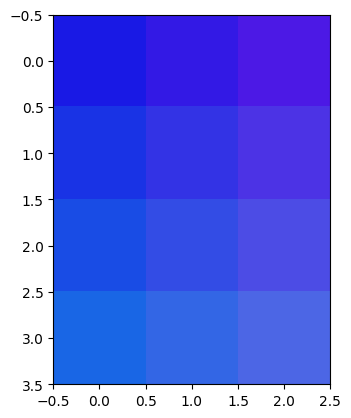

In [62]:
_ = plt.imshow(i)

In [42]:
i.reshape(36)    # we get a column "vector"

array([0.1, 0.1, 0.9, 0.2, 0.1, 0.9, 0.3, 0.1, 0.9, 0.1, 0.2, 0.9, 0.2,
       0.2, 0.9, 0.3, 0.2, 0.9, 0.1, 0.3, 0.9, 0.2, 0.3, 0.9, 0.3, 0.3,
       0.9, 0.1, 0.4, 0.9, 0.2, 0.4, 0.9, 0.3, 0.4, 0.9])

In [43]:
print(i.shape)
i_sh = i.shape
i.reshape(i_sh[0] * i_sh[1] * i_sh[2], 1)  # Also known as "flattening"

(4, 3, 3)


array([[0.1],
       [0.1],
       [0.9],
       [0.2],
       [0.1],
       [0.9],
       [0.3],
       [0.1],
       [0.9],
       [0.1],
       [0.2],
       [0.9],
       [0.2],
       [0.2],
       [0.9],
       [0.3],
       [0.2],
       [0.9],
       [0.1],
       [0.3],
       [0.9],
       [0.2],
       [0.3],
       [0.9],
       [0.3],
       [0.3],
       [0.9],
       [0.1],
       [0.4],
       [0.9],
       [0.2],
       [0.4],
       [0.9],
       [0.3],
       [0.4],
       [0.9]])

### 2.4. Vectorization


In [44]:
dim = 100    # try increasing this after running experiment

In [45]:
A = np.random.rand(dim, dim)
B = np.random.rand(dim, dim)

In [46]:
A[0].size, A[1].size

(100, 100)

In [47]:
def add_arrays(A, B): 
    C = np.zeros((A[0].size, A[1].size))
    
    for i in range(A[0].size): 
        for j in range(A[1].size): 
            C[i, j] = A[i, j] + B[i, j]
    return C

In [48]:
%time C = add_arrays(A, B)

CPU times: total: 0 ns
Wall time: 6 ms


In [49]:
%time C = A + B

CPU times: total: 0 ns
Wall time: 0 ns


In [50]:
import time 

# Non-vectorized time 
start = time.time() 

C = add_arrays(A, B)

end = time.time() 
non_vec_time = end - start 


## Vectorized time 
start = time.time() 

C = A + B 

end = time.time() 
vec_time = end - start

In [51]:
vec_time / non_vec_time * 100

0.0

In [52]:
%%time
total = 0
for i in np.arange(100_000_000): 
    total += i 
print(total)

4999999950000000
CPU times: total: 22.9 s
Wall time: 28.9 s


In [53]:
%time sum(np.arange(100_000_000))

CPU times: total: 8.17 s
Wall time: 8.82 s


np.int64(4999999950000000)

**NOTE:** Moral of the story: don't write your own code when performance is an issue!